In [2]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [3]:
# read in csv as dataframe
county_df = pd.read_csv("county_data_mlseg2.csv", index_col=0)
county_df.head()

,county,state,lat,long,TotalPop,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Abbeville,SC,34.223334,-82.461707,24788.0,12433.0,8215.0,4101.0,0.661,0.330,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,Acadia,LA,30.295065,-92.414197,62607.0,28425.0,22596.0,5443.0,0.795,0.191,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,Accomack,VA,37.767072,-75.632346,32840.0,16938.0,9172.0,7578.0,0.542,0.447,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,Ada,ID,43.452658,-116.241552,435117.0,259389.0,130699.0,120539.0,0.504,0.465,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,Adair,IA,41.330756,-94.471059,7192.0,4183.0,2917.0,1197.0,0.697,0.286,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [4]:
# check columns
county_df.columns

Index(['county', 'state', 'lat', 'long', 'TotalPop', 'total_votes20',
       'votes20_Donald_Trump', 'votes20_Joe_Biden',
       'percentage20_Donald_Trump', 'percentage20_Joe_Biden', 'cases',
       'deaths', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'Income', 'IncomePerCap', 'Poverty', 'Professional',
       'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool',
       'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute',
       'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'],
      dtype='object')

In [5]:
county_df['normalized_cases'] = county_df['cases']/county_df['TotalPop']
county_df['normalized_cases']

0       0.032475
1       0.050825
2       0.037363
3       0.040106
4       0.030868
          ...   
3108    0.024835
3109    0.038677
3110    0.038068
3810    0.035164
4101    0.073543
Name: normalized_cases, Length: 3048, dtype: float64

In [6]:
##county_df.hist

In [7]:
county_df.columns

Index(['county', 'state', 'lat', 'long', 'TotalPop', 'total_votes20',
       'votes20_Donald_Trump', 'votes20_Joe_Biden',
       'percentage20_Donald_Trump', 'percentage20_Joe_Biden', 'cases',
       'deaths', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'Income', 'IncomePerCap', 'Poverty', 'Professional',
       'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool',
       'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute',
       'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment', 'normalized_cases'],
      dtype='object')

In [8]:
# create economic dataframe for pca
econ_df = county_df[['normalized_cases','Income', 'IncomePerCap', 'Poverty', 'Employed', 'Unemployment', 'Professional']]
econ_df.head()

,normalized_cases,Income,IncomePerCap,Poverty,Employed,Unemployment,Professional
0,0.032475,35254.0,19234.0,22.7,9505.0,9.4,27.2
1,0.050825,40492.0,21591.0,21.5,24982.0,8.9,27.6
2,0.037363,42260.0,24266.0,19.8,13837.0,5.4,31.1
3,0.040106,60151.0,31642.0,11.8,214984.0,4.3,43.0
4,0.030868,49477.0,28861.0,9.5,3680.0,3.0,28.2


In [9]:
econ_df.dtypes

normalized_cases    float64
Income              float64
IncomePerCap        float64
Poverty             float64
Employed            float64
Unemployment        float64
Professional        float64
dtype: object

In [10]:
np.any(np.isnan(econ_df['normalized_cases']))

False

In [11]:
# create scaled df
econ_scaled = RobustScaler().fit_transform(econ_df)
econ_scaled[:5]

array([[ 0.29768353, -0.88405873, -0.83658255,  0.9375    , -0.04750637,
         1.        , -0.43421053],
       [ 1.16680533, -0.51827022, -0.5065976 ,  0.7875    ,  0.58118634,
         0.85294118, -0.38157895],
       [ 0.52918197, -0.39480438, -0.13209198,  0.575     ,  0.12846422,
        -0.17647059,  0.07894737],
       [ 0.65912598,  0.85458894,  0.90056351, -0.425     ,  8.29927593,
        -0.5       ,  1.64473684],
       [ 0.22153254,  0.10918487,  0.51121767, -0.7125    , -0.28412426,
        -0.88235294, -0.30263158]])

In [12]:
scaled_econ_df = pd.DataFrame(econ_scaled, columns= ['normalized_cases','Income', 'IncomePerCap', 'Poverty', 'Employed', 'Unemployment', 'Professional'])
scaled_econ_df.head()

,normalized_cases,Income,IncomePerCap,Poverty,Employed,Unemployment,Professional
0,0.297684,-0.884059,-0.836583,0.9375,-0.047506,1.000000,-0.434211
1,1.166805,-0.518270,-0.506598,0.7875,0.581186,0.852941,-0.381579
2,0.529182,-0.394804,-0.132092,0.5750,0.128464,-0.176471,0.078947
3,0.659126,0.854589,0.900564,-0.4250,8.299276,-0.500000,1.644737
4,0.221533,0.109185,0.511218,-0.7125,-0.284124,-0.882353,-0.302632


In [13]:
y = scaled_econ_df['normalized_cases']
scaled_cases = pd.DataFrame(y, columns = ['normalized_cases'])
scaled_cases.head()

,normalized_cases
0,0.297684
1,1.166805
2,0.529182
3,0.659126
4,0.221533


In [14]:
X_scaled = scaled_econ_df.drop(['normalized_cases'], axis=1)
X_scaled.head()

,Income,IncomePerCap,Poverty,Employed,Unemployment,Professional
0,-0.884059,-0.836583,0.9375,-0.047506,1.000000,-0.434211
1,-0.518270,-0.506598,0.7875,0.581186,0.852941,-0.381579
2,-0.394804,-0.132092,0.5750,0.128464,-0.176471,0.078947
3,0.854589,0.900564,-0.4250,8.299276,-0.500000,1.644737
4,0.109185,0.511218,-0.7125,-0.284124,-0.882353,-0.302632


In [15]:
# initialize pca model
pca = PCA(n_components=2)

In [16]:
# get two principal components for the iris data
X = pca.fit_transform(X_scaled)
X[:5]

array([[-1.66237441,  1.81758077],
       [-1.00409553,  1.36181424],
       [-1.4181055 ,  0.4092722 ],
       [ 6.89369296, -1.41157477],
       [-1.78496402, -0.91629211]])

In [17]:
# instantiate model
regressor = RandomForestRegressor(n_estimators=100,random_state=48)

In [18]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

In [19]:
# fit model
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=48)

In [31]:
my_regress = regressor.fit(X_train, y_train)



In [32]:
# make predictions
y_pred = regressor.predict(X_test)
y_pred[:5]

array([0.34469358, 0.8036104 , 0.04642754, 0.8518295 , 0.46203042])

In [33]:
# Create df with pca and predictions
econ_pca_pred = pd.DataFrame(
    data=X, columns=["principal component 1", "principal component 2"]
)
econ_pca_pred.head()

,principal component 1,principal component 2
0,-1.662374,1.817581
1,-1.004096,1.361814
2,-1.418106,0.409272
3,6.893693,-1.411575
4,-1.784964,-0.916292


In [34]:
# plot components
print(pca.explained_variance_)

[41.84944075  2.40138947]


In [35]:
print(pca.components_)

[[ 0.04003528  0.03929823 -0.01145061  0.99765608  0.00163436  0.03743496]
 [-0.50381653 -0.4858889   0.45747131  0.05765967  0.40482044 -0.36550876]]


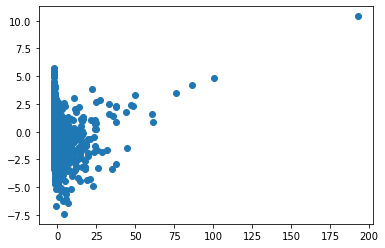

In [36]:
# plot pca
plt.scatter(econ_pca_pred['principal component 1'], econ_pca_pred['principal component 2'])
plt.show()

In [37]:
print(X_train.shape)
print(y_train.shape)
print(y_pred.shape)

(2286, 2)
(2286,)
(762,)


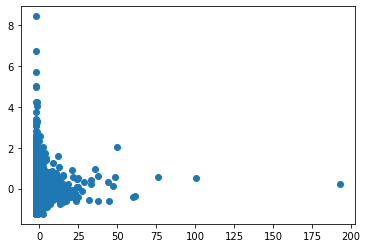

In [38]:
# plot predictions
# rephrased y_train to be same size as X
#np.linspace
plt.scatter(X_train[:,0], y_train)

plt.show()

In [39]:
# check score
regressor.score(X_train, y_train)

0.8555685580612463

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.6250135553335134
Mean Squared Error: 0.7335986795152108
Root Mean Squared Error: 0.8565037533573399
R Squared: -0.025243711354378418


In [41]:
pred_df = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_pred})
pred_df.head()

,Real Values,Predicted Values
1050,0.426289,0.344694
697,-0.374408,0.803610
1636,-0.237645,0.046428
2655,2.026398,0.851830
2752,-0.595934,0.462030


In [42]:
print(my_regress.classification_report(y,y_pred))

AttributeError: 'RandomForestRegressor' object has no attribute 'classification_report'

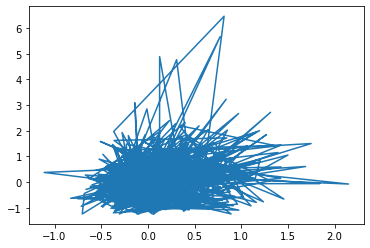

In [57]:
# plot line chart for predictions
plt.plot(pred_df['Predicted Values'], pred_df['Real Values'])
plt.show()

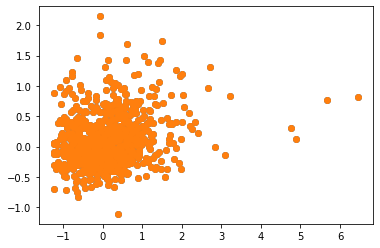

In [58]:
plt.scatter(pred_df['Real Values'], pred_df['Predicted Values'])
plt.scatter(pred_df['Real Values'], pred_df['Predicted Values'])
plt.show()